<a href="https://colab.research.google.com/github/aborbala/SQL-Portfolio/blob/master/04_01_evaluate_and_compare_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 45.5 MB/s eta 0:00:00


In [ ]:
# Change directory to your Google Drive
%cd /content/drive/MyDrive/

# Clone the Detectron2 repository
#!git clone https://github.com/facebookresearch/detectron2.git

# Change directory to the cloned repository
%cd detectron2

# Install Detectron2 (the -e flag means "editable mode", so changes to the code will immediately take effect)
!pip install -e .

/content/drive/MyDrive
/content/drive/MyDrive/detectron2
Obtaining file:///content/drive/MyDrive/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=b428a1b99f0ad877391f5b771b5b2d2aaa700773f7ede89841ac001eb5f8d80c
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import os
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2 import model_zoo
import json
import glob

In [ ]:
# Directory where your model folders are located
data_folder = "/content/drive/MyDrive/data/400_5816/"
model_directory = os.path.join(data_folder, 'models/')
image_root = os.path.join(data_folder, 'sliced_output_2020S/')

In [ ]:
# Pattern to match all cached COCO annotation files
# This assumes the naming convention is consistent as per your previous message
annotation_pattern = os.path.join(model_directory, "*/my_dataset_val_coco_format.json")

# Find all files matching the pattern
cached_annotation_files = glob.glob(annotation_pattern)

# Iterate and remove each file
for file_path in cached_annotation_files:
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Removed cached annotations file: {file_path}")
    else:
        print(f"File not found (already removed?): {file_path}")

# Confirm completion
print("All cached annotations files have been removed.")

All cached annotations files have been removed.


In [ ]:
model_paths = [os.path.join(model_directory, f) for f in os.listdir(model_directory) if f.endswith('.pth')]

models = {}
cfgs = {}

# Load each model and its configuration
for path in model_paths:
    model_name = os.path.basename(path).split('.pth')[0]
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
    cfg.MODEL.WEIGHTS = path
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
    cfg.TEST.DETECTIONS_PER_IMAGE = 1000
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
    cfg.OUTPUT_DIR = os.path.join(model_directory, model_name)

    models[model_name] = DefaultPredictor(cfg)
    cfgs[model_name] = cfg  # Store the configuration

# Print the loaded models to confirm
print("Loaded models:")
for model_name in models:
    print(f"Model name: {model_name}")

# Print the configurations to confirm
print("\nConfigurations:")
for model_name, cfg in cfgs.items():
    print(f"Model name: {model_name}, Config: {cfg}")

[07/05 10:08:29 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/data/400_5816/models/model_9.pth ...


backbone.bottom_up.res2.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv1.weight
backbone.bottom_up.res2.0.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv2.weight
backbone.bottom_up.res2.0.conv3.weight
backbone.bottom_up.res2.1.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv1.weight
backbone.bottom_up.res2.1.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv2.weight
backbone.bottom_up.res2.1.conv3.weight
backbone.bottom_up.res2.2.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv1.weight
backbone.bottom_up.res2.2.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv2.weight
backbone.bottom_up.res2.2.conv3.weight
backbone.bottom_up.res3.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res3.0.conv1.weight
backbone.bottom_up.res3.0.conv2.norm.{bias, running_mean,

[07/05 10:08:32 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/data/400_5816/models/model_aoi2_70.pth ...


backbone.bottom_up.res2.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv1.weight
backbone.bottom_up.res2.0.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv2.weight
backbone.bottom_up.res2.0.conv3.weight
backbone.bottom_up.res2.1.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv1.weight
backbone.bottom_up.res2.1.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv2.weight
backbone.bottom_up.res2.1.conv3.weight
backbone.bottom_up.res2.2.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv1.weight
backbone.bottom_up.res2.2.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv2.weight
backbone.bottom_up.res2.2.conv3.weight
backbone.bottom_up.res3.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res3.0.conv1.weight
backbone.bottom_up.res3.0.conv2.norm.{bias, running_mean,

[07/05 10:08:34 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/data/400_5816/models/model_aoi2_70p_8000i.pth ...


backbone.bottom_up.res2.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv1.weight
backbone.bottom_up.res2.0.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv2.weight
backbone.bottom_up.res2.0.conv3.weight
backbone.bottom_up.res2.1.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv1.weight
backbone.bottom_up.res2.1.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv2.weight
backbone.bottom_up.res2.1.conv3.weight
backbone.bottom_up.res2.2.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv1.weight
backbone.bottom_up.res2.2.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv2.weight
backbone.bottom_up.res2.2.conv3.weight
backbone.bottom_up.res3.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res3.0.conv1.weight
backbone.bottom_up.res3.0.conv2.norm.{bias, running_mean,

Loaded models:
Model name: model_9
Model name: model_aoi2_70
Model name: model_aoi2_70p_8000i

Configurations:
Model name: model_9, Config: CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('coco_2017_val',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256],

In [ ]:
#Load annotation
json_file = os.path.join(data_folder, "val.json")

with open(json_file) as f:
    annotations = json.load(f)

print("Annotations sample:", annotations["annotations"][0])

Annotations sample: {'id': 1, 'image_id': 0, 'category_id': 0, 'segmentation': [[485, 0, 484, 1, 483, 1, 482, 2, 482, 6, 481, 7, 481, 11, 482, 11, 483, 12, 484, 12, 485, 13, 486, 13, 487, 14, 488, 13, 490, 13, 491, 14, 496, 14, 497, 15, 499, 15, 499, 0]], 'bbox': [481, 0, 19, 16], 'area': 231.5, 'iscrowd': 0}


In [ ]:
from detectron2.data.datasets import load_coco_json
from detectron2.data import DatasetCatalog, MetadataCatalog
import os

dataset_name = 'my_dataset_val'

# Function to load validation data
def get_val_data():
    return load_coco_json(json_file, image_root, dataset_name)

# Remove and re-register the dataset to ensure it's updated
if dataset_name in DatasetCatalog.list():
    DatasetCatalog.remove(dataset_name)

DatasetCatalog.register(dataset_name, get_val_data)
MetadataCatalog.get(dataset_name).set(thing_classes=["tree_crown"], json_file=json_file)

# Print the metadata to confirm registration
my_dataset_val_metadata = MetadataCatalog.get(dataset_name)
print(my_dataset_val_metadata)

# Check if the JSON file exists
print(f"Checking if JSON file exists at: {json_file}")
if not os.path.exists(json_file):
    raise FileNotFoundError(f"The JSON file was not found at {json_file}")
else:
    print("JSON file found.")

dataset_dicts = get_val_data()
print(f"Number of samples in validation dataset: {len(dataset_dicts)}")
print("Sample data:", dataset_dicts[0])



Metadata(name='my_dataset_val', thing_classes=['tree_crown'], json_file='/content/drive/MyDrive/data/400_5816/val.json')
Checking if JSON file exists at: /content/drive/MyDrive/data/400_5816/val.json
JSON file found.
WARNING [07/05 10:08:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/05 10:08:39 d2.data.datasets.coco]: Loaded 23 images in COCO format from /content/drive/MyDrive/data/400_5816/val.json
Number of samples in validation dataset: 23
Sample data: {'file_name': '/content/drive/MyDrive/data/400_5816/sliced_output_2020S/3dm_33_400_5817_1_be_nobuild_2_5.tif', 'height': 500, 'width': 500, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [481, 0, 19, 16], 'category_id': 0, 'segmentation': [[485, 0, 484, 1, 483, 1, 482, 2, 482, 6, 481, 7, 481, 11, 482, 11, 483, 12, 484, 12, 485, 13, 486, 13, 487, 14, 488, 13, 490, 13, 491, 14, 496, 14, 497, 15, 499, 15, 499, 0]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'isc

In [ ]:
# Evaluation
evaluation_results = {}

for model_name, predictor in models.items():
    print(f"Evaluating... {model_name}:")
    cfg = cfgs[model_name]

    output_dir = os.path.join(model_directory, model_name)
    os.makedirs(output_dir, exist_ok=True)  # Create output directory

    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir=output_dir)

    val_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(predictor.model, val_loader, evaluator)
    evaluation_results[model_name] = results

    # Save the results as a JSON file
    results_file = os.path.join(output_dir, f"{model_name}_evaluation_results.json")
    with open(results_file, 'w') as f:
        json.dump(results, f, indent=4)

# Display evaluation results
for model_name, results in evaluation_results.items():
    print(f"Results for {model_name}:")
    print(results)


Evaluating... model_9:
[07/05 10:08:46 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [07/05 10:08:46 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [07/05 10:08:46 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/05 10:08:46 d2.data.datasets.coco]: Loaded 23 images in COCO format from /content/drive/MyDrive/data/400_5816/val.json
[07/05 10:08:46 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| tree_crown | 1158         |
|            |              |
[07/05 10:08:46 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/05 10:08:46 d2.data.common]: Serializing the dat

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/05 10:08:49 d2.evaluation.evaluator]: Inference done 11/23. Dataloading: 0.0018 s/iter. Inference: 0.1806 s/iter. Eval: 0.0001 s/iter. Total: 0.1825 s/iter. ETA=0:00:02
[07/05 10:08:52 d2.evaluation.evaluator]: Total inference time: 0:00:03.343965 (0.185776 s / iter per device, on 1 devices)
[07/05 10:08:52 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.181071 s / iter per device, on 1 devices)
[07/05 10:08:52 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[07/05 10:08:52 d2.evaluation.coco_evaluation]: Saving results to /content/drive/MyDrive/data/400_5816/models/model_9/coco_instances_results.json
[07/05 10:08:52 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
WARNING [07/05 10:08:52 d2.evaluation.coco_evaluation]: No predictions from the model!
Evaluating... model_aoi2_70:
[07/05 10:08:52 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [07/05 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[07/05 10:08:54 d2.evaluation.evaluator]: Inference done 13/23. Dataloading: 0.0060 s/iter. Inference: 0.1802 s/iter. Eval: 0.0001 s/iter. Total: 0.1863 s/iter. ETA=0:00:01
[07/05 10:08:56 d2.evaluation.evaluator]: Total inference time: 0:00:03.411150 (0.189508 s / iter per device, on 1 devices)
[07/05 10:08:56 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.181130 s / iter per device, on 1 devices)
[07/05 10:08:56 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[07/05 10:08:56 d2.evaluation.coco_evaluation]: Saving results to /content/drive/MyDrive/data/400_5816/models/model_aoi2_70/coco_instances_results.json
[07/05 10:08:56 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
WARNING [07/05 10:08:56 d2.evaluation.coco_evaluation]: No predictions from the model!
Evaluating... model_aoi2_70p_8000i:
[07/05 10:08:56 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WA

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[07/05 10:09:00 d2.evaluation.evaluator]: Inference done 15/23. Dataloading: 0.0020 s/iter. Inference: 0.1759 s/iter. Eval: 0.0003 s/iter. Total: 0.1783 s/iter. ETA=0:00:01
[07/05 10:09:01 d2.evaluation.evaluator]: Total inference time: 0:00:03.235681 (0.179760 s / iter per device, on 1 devices)
[07/05 10:09:01 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.174387 s / iter per device, on 1 devices)
[07/05 10:09:01 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[07/05 10:09:01 d2.evaluation.coco_evaluation]: Saving results to /content/drive/MyDrive/data/400_5816/models/model_aoi2_70p_8000i/coco_instances_results.json
[07/05 10:09:01 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision 

In [ ]:
print("Sample file paths and annotations:")
for i in range(3):
    print(f"File path: {dataset_dicts[i]['file_name']}")
    print(f"Annotations: {dataset_dicts[i]['annotations']}")


Sample file paths and annotations:
File path: /content/drive/MyDrive/data/400_5816/sliced_output_2020S/3dm_33_400_5817_1_be_nobuild_2_5.tif
Annotations: [{'iscrowd': 0, 'bbox': [481, 0, 19, 16], 'category_id': 0, 'segmentation': [[485, 0, 484, 1, 483, 1, 482, 2, 482, 6, 481, 7, 481, 11, 482, 11, 483, 12, 484, 12, 485, 13, 486, 13, 487, 14, 488, 13, 490, 13, 491, 14, 496, 14, 497, 15, 499, 15, 499, 0]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [61, 0, 72, 33], 'category_id': 0, 'segmentation': [[96, 0, 95, 1, 61, 1, 62, 2, 62, 3, 64, 5, 64, 6, 67, 9, 67, 10, 75, 18, 76, 18, 81, 23, 81, 24, 82, 25, 82, 26, 83, 27, 84, 27, 85, 28, 89, 28, 90, 29, 94, 29, 95, 30, 99, 30, 100, 31, 102, 31, 104, 29, 105, 29, 106, 30, 107, 30, 108, 31, 109, 31, 110, 32, 113, 29, 114, 29, 115, 28, 116, 28, 117, 27, 119, 27, 120, 26, 121, 26, 122, 25, 124, 25, 125, 24, 126, 24, 127, 23, 129, 23, 130, 22, 131, 22, 131, 17, 132, 16, 132, 12, 131, 11, 131, 6, 130, 5, 130, 2, 129, 1, 129, 0]], 'b

[07/05 09:41:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/data/400_5816/models/model_9.pth ...


backbone.bottom_up.res2.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv1.weight
backbone.bottom_up.res2.0.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.0.conv2.weight
backbone.bottom_up.res2.0.conv3.weight
backbone.bottom_up.res2.1.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv1.weight
backbone.bottom_up.res2.1.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.1.conv2.weight
backbone.bottom_up.res2.1.conv3.weight
backbone.bottom_up.res2.2.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv1.weight
backbone.bottom_up.res2.2.conv2.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res2.2.conv2.weight
backbone.bottom_up.res2.2.conv3.weight
backbone.bottom_up.res3.0.conv1.norm.{bias, running_mean, running_var, weight}
backbone.bottom_up.res3.0.conv1.weight
backbone.bottom_up.res3.0.conv2.norm.{bias, running_mean,

{'instances': Instances(num_instances=0, image_height=500, image_width=500, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64), pred_masks: tensor([], device='cuda:0', size=(0, 500, 500), dtype=torch.bool)])}


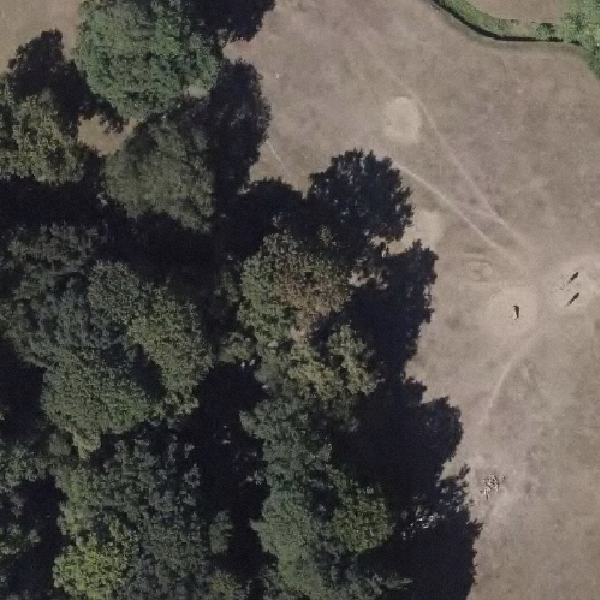

In [ ]:
# Test on single image
from detectron2.utils.visualizer import Visualizer
import cv2
from google.colab.patches import cv2_imshow

model_name = list(models.keys())[0]
cfg = cfgs[model_name]
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
predictor = DefaultPredictor(cfg)

img_path = dataset_dicts[5]["file_name"]
img = cv2.imread(img_path)
outputs = predictor(img)
print(outputs)  # Check if there are any predictions

v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(dataset_name), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
for model_name, results in evaluation_results.items():
    print(f"Results for {model_name}:")
    print(results)

Results for model_9:
OrderedDict([('bbox', {'AP': 0.0, 'AP50': 0.0, 'AP75': 0.0, 'APs': 0.0, 'APm': 0.0, 'APl': nan}), ('segm', {'AP': 0.0, 'AP50': 0.0, 'AP75': 0.0, 'APs': 0.0, 'APm': 0.0, 'APl': nan})])
Results for model_aoi2_70:
OrderedDict([('bbox', {'AP': nan, 'AP50': nan, 'AP75': nan, 'APs': nan, 'APm': nan, 'APl': nan})])
Results for model_aoi2_70p_8000i:
OrderedDict([('bbox', {'AP': nan, 'AP50': nan, 'AP75': nan, 'APs': nan, 'APm': nan, 'APl': nan})])


range(0, 3)


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

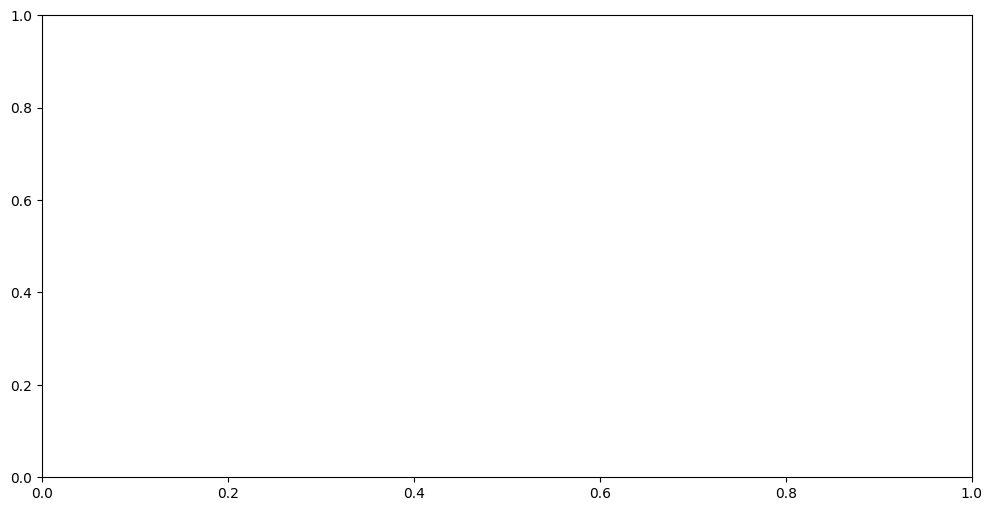

In [ ]:
import matplotlib.pyplot as plt

# Example metrics to plot: AP at IoU=0.50 (AP50), AP at IoU=0.75 (AP75), and AP at IoU=0.50:0.95 (AP).
ap50, ap75, ap = [], [], []

for model_name, results in evaluation_results.items():
    # Assuming 'bbox' is the key for object detection metrics. Adjust if necessary.
    if 'segm' in results:
        metrics = results['segm']
        ap50.append(metrics.get('AP50', 0))
        ap75.append(metrics.get('AP75', 0))
        ap.append(metrics.get('AP', 0))

# Names of the models
model_names = list(evaluation_results.keys())

# Creating the plot
plt.figure(figsize=(12, 6))
x = range(len(model_names))
print(x)

plt.plot(x, ap50, label='AP50', marker='o')
plt.plot(x, ap75, label='AP75', marker='o')
plt.plot(x, ap, label='AP', marker='o')

plt.xticks(x, model_names)
plt.xlabel('Model')
plt.ylabel('Average Precision')
plt.title('Comparison of Model Performance')
plt.legend()
plt.grid(True)
plt.show()

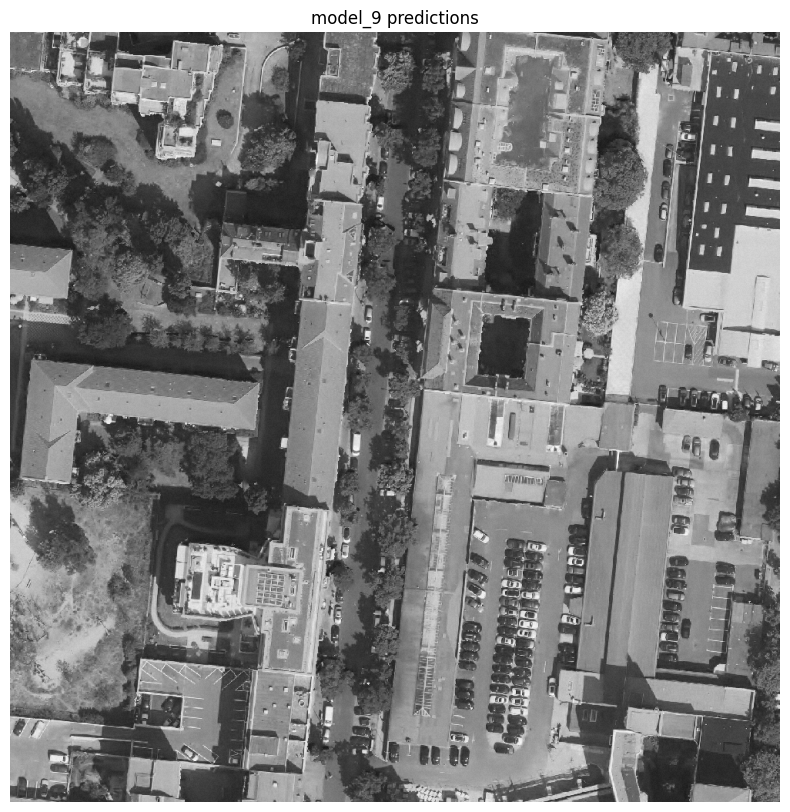

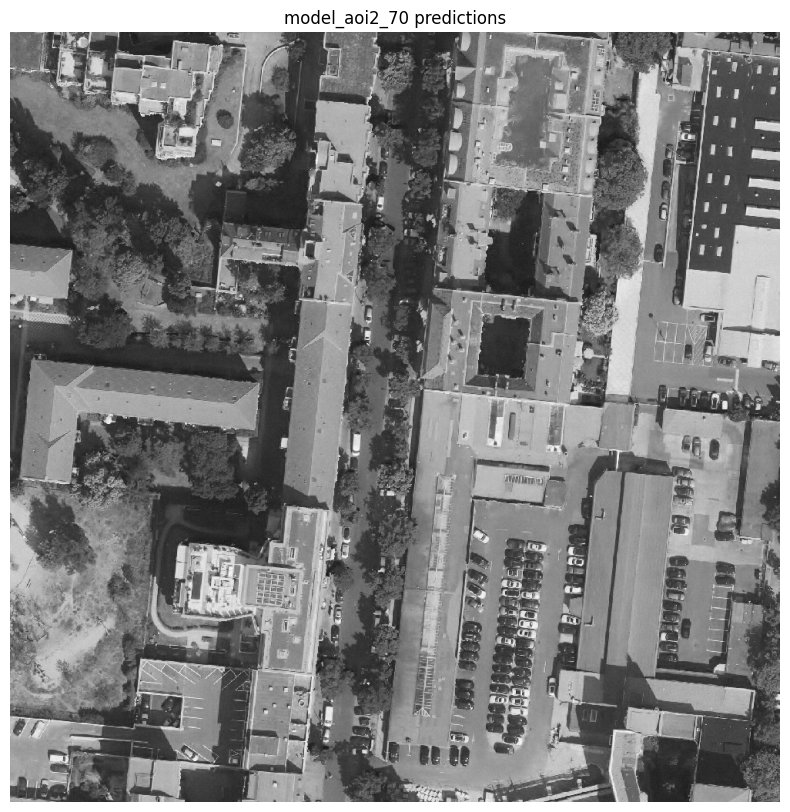

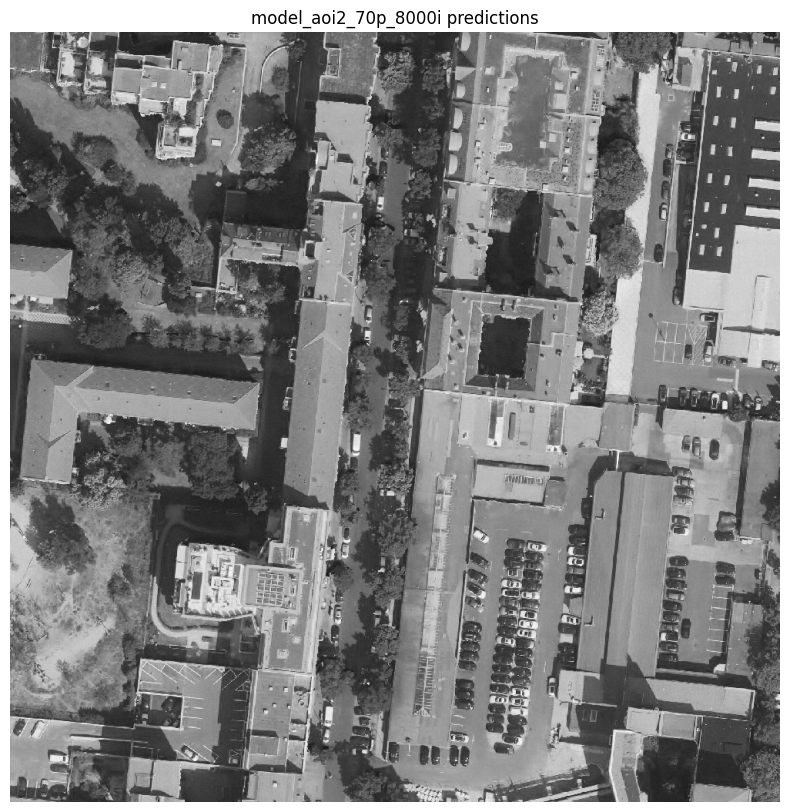

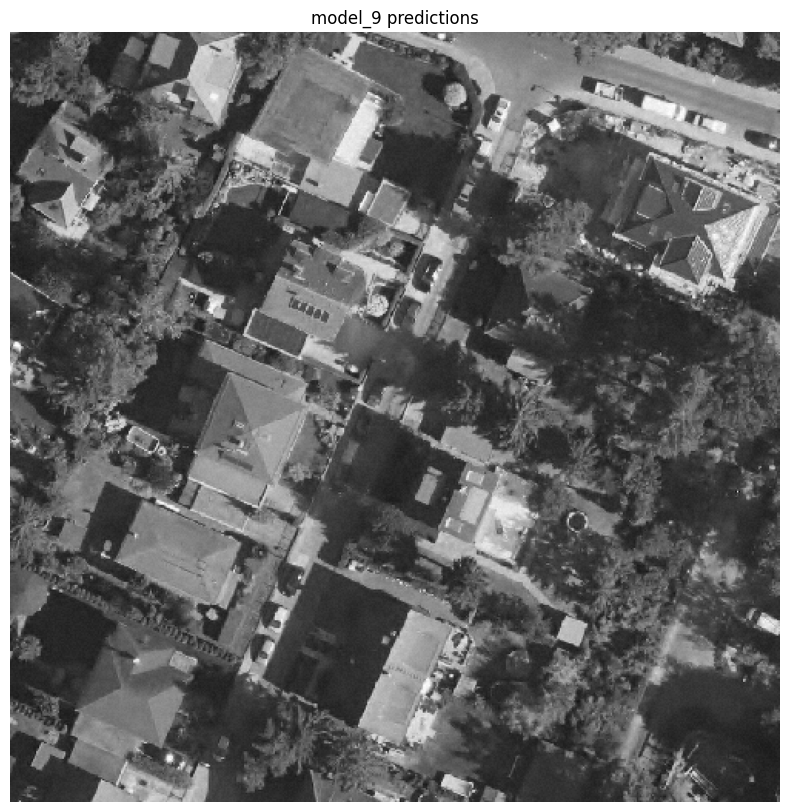

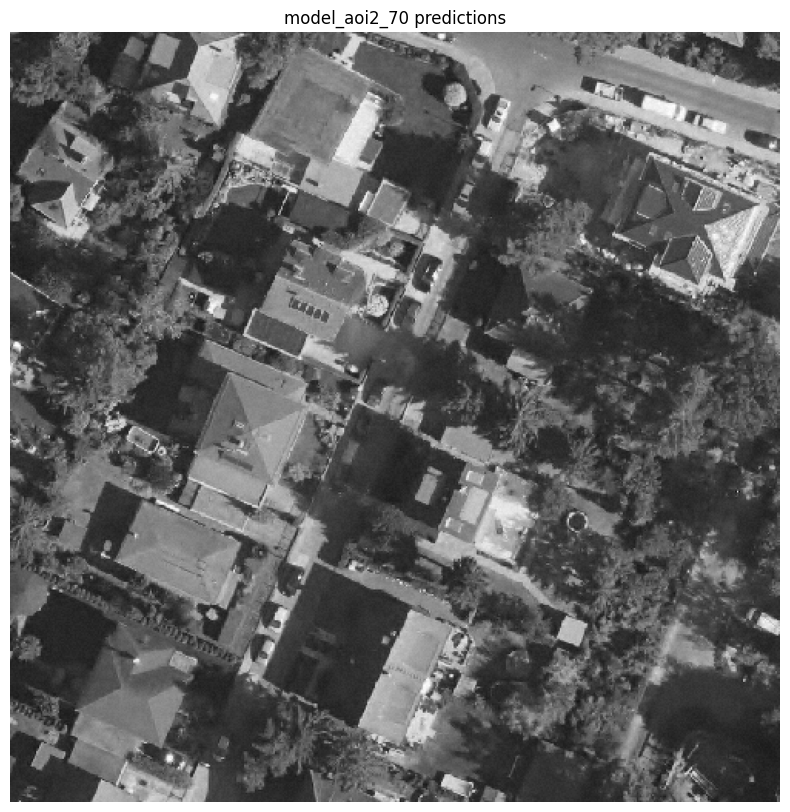

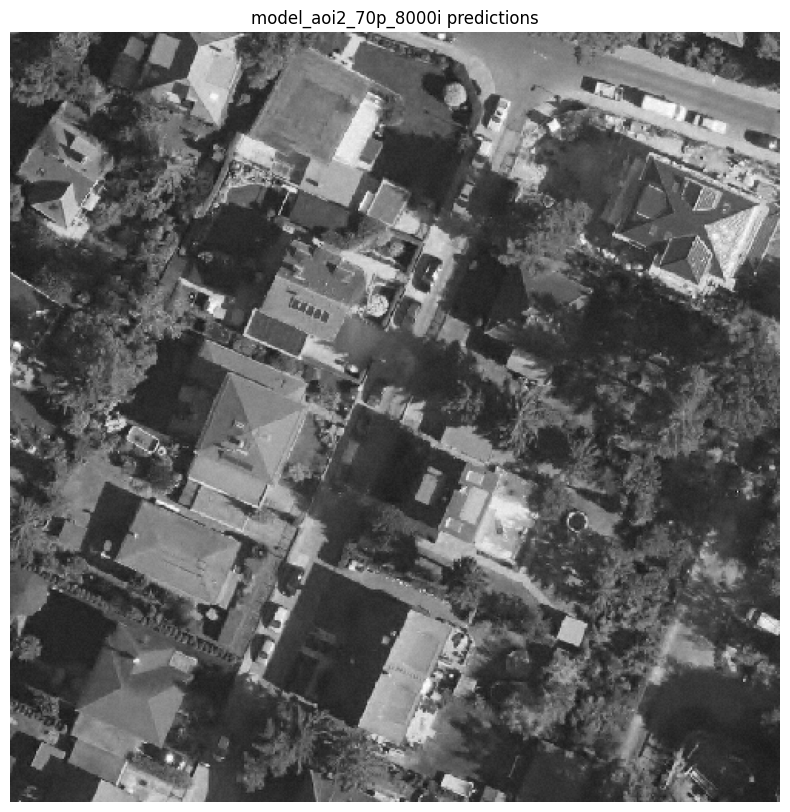

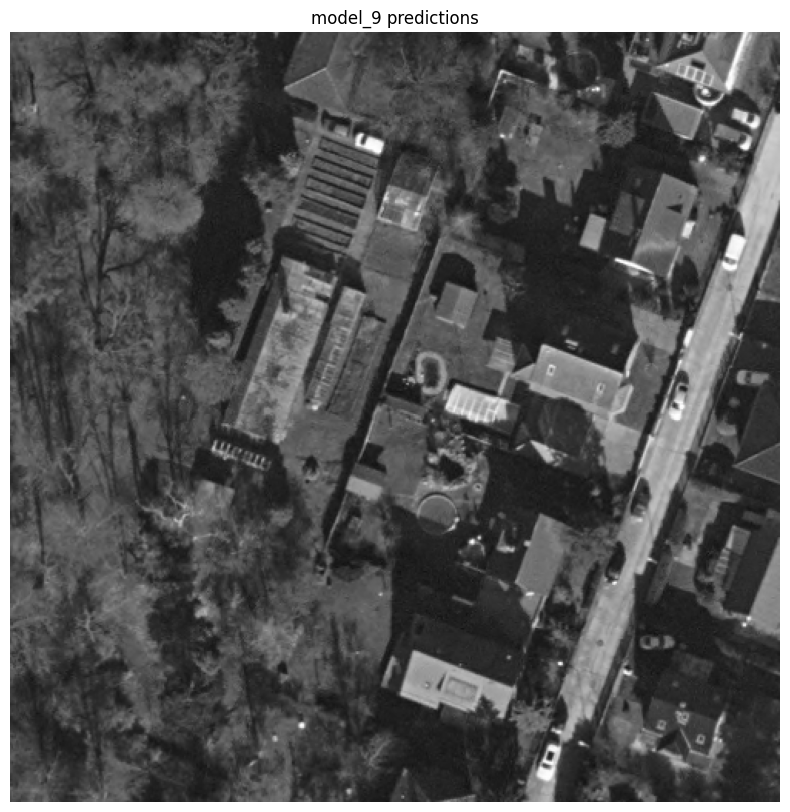

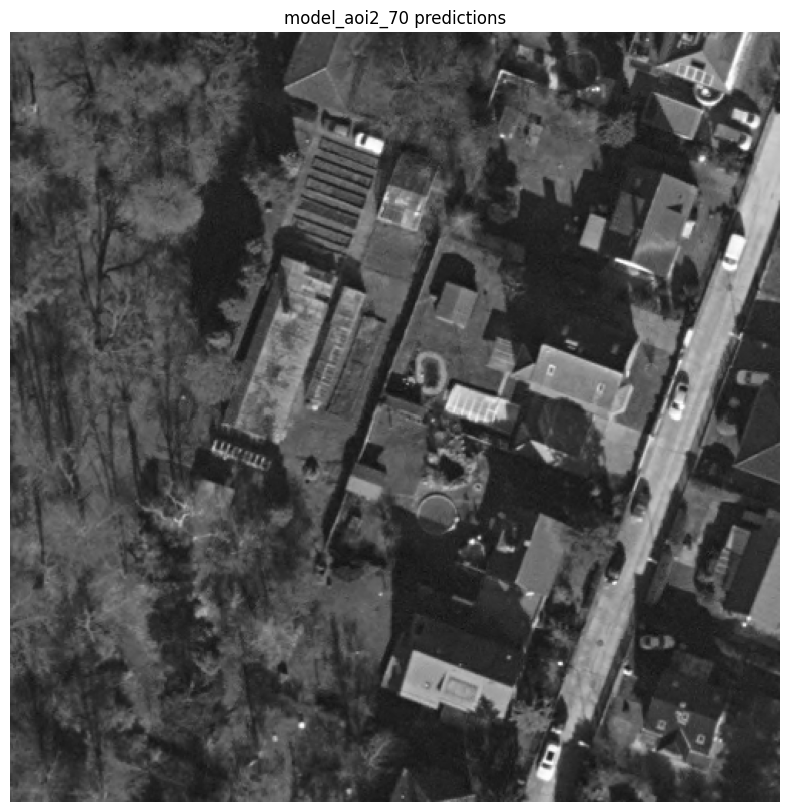

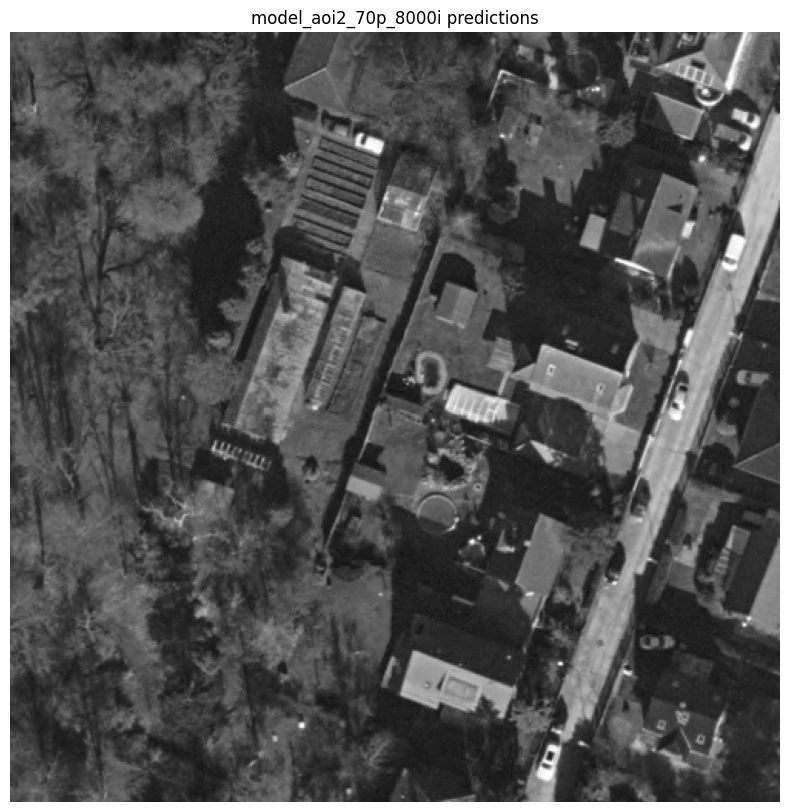

In [ ]:
import glob
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode, Visualizer
import cv2

# Directory where your new images are stored
new_images_directory = "/content/drive/MyDrive/data/test_imgs/"

# Load new images
new_images_paths = glob.glob(os.path.join(new_images_directory, "*.tif"))  # Adjust the pattern as needed

# Iterate over images and models
for image_path in new_images_paths:
    image = cv2.imread(image_path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for model_name, model in models.items():
        outputs = model(image)

        # Visualize the results
        v = Visualizer(image[:, :, ::-1],
                       metadata=my_dataset_val_metadata,
                       instance_mode=ColorMode.IMAGE_BW)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

        plt.figure(figsize=(10, 10))
        plt.imshow(out.get_image()[:, :, ::-1])
        plt.title(f"{model_name} predictions")
        plt.axis('off')
        plt.show()

### Detect overfitting

In [ ]:
# Define your training dataset name and paths
train_dataset_name = 'my_dataset_train'
train_json_file = os.path.join(data_folder, "train.json")
train_image_root = image_root

def get_train_data():
    return load_coco_json(train_json_file, train_image_root)

# Remove and re-register the training dataset to ensure it's updated
if train_dataset_name in DatasetCatalog.list():
    DatasetCatalog.remove(train_dataset_name)

DatasetCatalog.register(train_dataset_name, get_train_data)
MetadataCatalog.get(train_dataset_name).set(thing_classes=["tree_crown"])  # Update classes if different

# Print the metadata to confirm
my_dataset_train_metadata = MetadataCatalog.get(train_dataset_name)
print(my_dataset_train_metadata)


Metadata(name='my_dataset_train', thing_classes=['tree_crown'])


In [ ]:
def evaluate_model(predictor, dataset_name, cfg):
    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir="/tmp/output")
    val_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(predictor.model, val_loader, evaluator)
    return results

def detect_overfitting_underfitting(models, cfgs, train_dataset_name, val_dataset_name):
    fit_results = {}
    threshold_for_overfitting = 0.15  # Adjust as needed, e.g., 0.1 to 0.2
    low_value_threshold = 0.25  # Adjust based on your minimum acceptable performance

    for model_name, predictor in models.items():
        print(f"Evaluating... {model_name}")

        # Evaluate on training and validation datasets
        train_results = evaluate_model(predictor, train_dataset_name, cfgs[model_name])
        val_results = evaluate_model(predictor, val_dataset_name, cfgs[model_name])

        # Compare performance metrics
        train_ap = train_results["segm"]["AP"]
        val_ap = val_results["segm"]["AP"]

        if train_ap > val_ap + threshold_for_overfitting:
            fit_status = "Overfitting"
        elif train_ap < low_value_threshold and val_ap < low_value_threshold:
            fit_status = "Underfitting"
        else:
            fit_status = "Good Fit"

        fit_results[model_name] = {
            "Training AP": train_ap,
            "Validation AP": val_ap,
            "Status": fit_status
        }

    return fit_results


In [ ]:
fit_results = detect_overfitting_underfitting(models, cfgs, "my_dataset_train", "my_dataset_val")

# Display the results
for model_name, results in fit_results.items():
    print(f"Results for {model_name}: {results}")


Evaluating... model_9
[06/30 13:48:16 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [06/30 13:48:16 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/30 13:48:16 d2.evaluation.coco_evaluation]: Trying to convert 'my_dataset_train' to COCO format ...
[06/30 13:48:16 d2.data.datasets.coco]: Converting annotations of dataset 'my_dataset_train' to COCO format ...)
[06/30 13:48:17 d2.data.datasets.coco]: Loaded 88 images in COCO format from /content/drive/MyDrive/data/400_5816/train.json
[06/30 13:48:17 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/30 13:48:17 d2.data.datasets.coco]: Conversion finished, #images: 88, #annotations: 3596
[06/30 13:48:17 d2.data.datasets.coco]: Caching COCO format annotations at '/tmp/output/my_dataset_train_coco_format.json' ...
[06/30 13:48:18 d2.data.datasets.coco]: Loaded 88 i

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[06/30 13:48:21 d2.evaluation.evaluator]: Inference done 11/88. Dataloading: 0.0844 s/iter. Inference: 0.1993 s/iter. Eval: 0.0001 s/iter. Total: 0.2837 s/iter. ETA=0:00:21
[06/30 13:48:26 d2.evaluation.evaluator]: Inference done 35/88. Dataloading: 0.0195 s/iter. Inference: 0.2068 s/iter. Eval: 0.0001 s/iter. Total: 0.2266 s/iter. ETA=0:00:12
[06/30 13:48:31 d2.evaluation.evaluator]: Inference done 58/88. Dataloading: 0.0127 s/iter. Inference: 0.2100 s/iter. Eval: 0.0001 s/iter. Total: 0.2230 s/iter. ETA=0:00:06
[06/30 13:48:36 d2.evaluation.evaluator]: Inference done 82/88. Dataloading: 0.0093 s/iter. Inference: 0.2104 s/iter. Eval: 0.0001 s/iter. Total: 0.2199 s/iter. ETA=0:00:01
[06/30 13:48:38 d2.evaluation.evaluator]: Total inference time: 0:00:18.312506 (0.220633 s / iter per device, on 1 devices)
[06/30 13:48:38 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:17 (0.210254 s / iter per device, on 1 devices)
[06/30 13:48:38 d2.evaluation.coco_evaluation]: Prepar

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[06/30 13:48:41 d2.evaluation.evaluator]: Inference done 14/23. Dataloading: 0.0083 s/iter. Inference: 0.2041 s/iter. Eval: 0.0001 s/iter. Total: 0.2126 s/iter. ETA=0:00:01
[06/30 13:48:43 d2.evaluation.evaluator]: Total inference time: 0:00:03.838208 (0.213234 s / iter per device, on 1 devices)
[06/30 13:48:43 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.203657 s / iter per device, on 1 devices)
[06/30 13:48:43 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/30 13:48:43 d2.evaluation.coco_evaluation]: Saving results to /tmp/output/coco_instances_results.json
[06/30 13:48:43 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
WARNING [06/30 13:48:43 d2.evaluation.coco_evaluation]: No predictions from the model!


KeyError: 'segm'

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
import cv2
from detectron2.utils.visualizer import Visualizer, ColorMode
import numpy as np

# Load your dataset metadata (change 'my_dataset_val' to your dataset's name)
dataset_dicts = DatasetCatalog.get("my_dataset_val")
my_dataset_val_metadata = MetadataCatalog.get("my_dataset_val")


In [ ]:
from google.colab.patches import cv2_imshow

def visualize_false_positives(dataset_dicts, predictions, metadata):
    for img_dict, output in zip(dataset_dicts, predictions):
        # Load the image
        img = cv2.imread(img_dict["file_name"])
        visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)

        # Draw model predictions
        vis_output = visualizer.draw_instance_predictions(output["instances"].to("cpu"))

        # Draw ground truth annotations
        vis_output = visualizer.draw_dataset_dict(img_dict)

        # Convert image for display in Colab
        visualized_image = vis_output.get_image()[:, :, ::-1]

        # Display the image
        cv2_imshow(visualized_image)

In [ ]:
import cv2

predictions = []
for d in dataset_dicts:
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    predictions.append(outputs)


In [ ]:
visualize_false_positives(dataset_dicts, predictions, my_dataset_val_metadata)

In [ ]:
import pyproj
from shapely.ops import transform

def pixel_to_world(bbox, transform_matrix):
    # Converts bbox from pixel coordinates to world coordinates
    # bbox format: [x1, y1, x2, y2]
    minx, miny = rasterio.transform.xy(transform=transform_matrix, rows=bbox[1], cols=bbox[0], offset='ul')
    maxx, maxy = rasterio.transform.xy(transform=transform_matrix, rows=bbox[3], cols=bbox[2], offset='ul')
    return minx[0], miny[0], maxx[0], maxy[0]

def transform_to_epsg4326(bbox, original_crs):
    project = pyproj.Transformer.from_crs(pyproj.CRS(original_crs), pyproj.CRS('EPSG:4326'), always_xy=True).transform
    poly = Polygon([(bbox[0], bbox[1]), (bbox[2], bbox[1]), (bbox[2], bbox[3]), (bbox[0], bbox[3]), (bbox[0], bbox[1])])
    poly_epsg4326 = transform(project, poly)
    return poly_epsg4326


In [ ]:
import numpy as np
from affine import Affine
import json
from affine import Affine

# Load the transform from the file
transform_array = np.loadtxt("/content/drive/MyDrive/data/382_5826_1/transform_matrix.txt").flatten()
transform = Affine(*transform_array)
transform_matrices = {}
# Load and deserialize the transform
with open("/content/drive/MyDrive/data/382_5826_1/transform.json", "r") as f:
    transform_data = json.load(f)
transform = Affine(*transform_data["transform"])

In [ ]:
import json
import os
from shapely.geometry import mapping, Polygon
from detectron2.structures import Boxes, pairwise_iou
import torch
import rasterio.transform

def pixel_to_world(bbox, transform_matrix):
    """
    Converts bounding box coordinates from pixel space to world space.
    bbox: [x1, y1, x2, y2] format in pixel coordinates.
    transform_matrix: Affine transformation matrix.
    """
    minx, miny = rasterio.transform.xy(transform=transform_matrix, rows=bbox[1], cols=bbox[0], offset='ul')[0]
    maxx, maxy = rasterio.transform.xy(transform=transform_matrix, rows=bbox[3], cols=bbox[2], offset='ul')[0]
    return [minx, miny, maxx, maxy]


def convert_to_xyxy_format(boxes):
    # Converts boxes from [x, y, width, height] to [x1, y1, x2, y2] format
    new_boxes = []
    for box in boxes:
        x1, y1, w, h = box
        x2 = x1 + w
        y2 = y1 + h
        new_boxes.append([x1, y1, x2, y2])
    return new_boxes

def export_false_positives_to_geojson(dataset_dicts, predictions, metadata, output_folder, iou_threshold=0.5):
    for img_dict, output in zip(dataset_dicts, predictions):
        # Initialize GeoJSON structure for false positives
        geojson = {
            "type": "FeatureCollection",
            "features": []
        }

        instances = output["instances"].to("cpu")
        pred_boxes = Boxes(instances.pred_boxes.tensor)
        pred_classes = instances.pred_classes

        # Get ground truth boxes and classes
        gt_boxes = [ann["bbox"] for ann in img_dict["annotations"]]
        gt_boxes = convert_to_xyxy_format(gt_boxes)  # Convert to [x1, y1, x2, y2] format
        if gt_boxes:
            gt_boxes = Boxes(torch.tensor(gt_boxes).to(torch.float32))

            # Calculate IoU between each prediction and ground truth
            ious = pairwise_iou(pred_boxes, gt_boxes)

            for idx, bbox in enumerate(pred_boxes):
                # Determine if this prediction is a false positive
                max_iou = torch.max(ious[idx]).item()
                is_false_positive = max_iou < iou_threshold

                if is_false_positive:
                    geojson_feature = mapping(poly)
                    # Create a GeoJSON feature
                    feature = {
                        "type": "Feature",
                        "properties": {
                            "class": metadata.thing_classes[pred_classes[idx]],
                            "confidence": instances.scores[idx].item()
                        },
                        "geometry": geojson_feature
                    }
                    geojson["features"].append(feature)

        # Write GeoJSON for false positives to file
        img_name = os.path.splitext(os.path.basename(img_dict["file_name"]))[0]
        output_path = os.path.join(output_folder, f"{img_name}_false_positives.geojson")
        with open(output_path, 'w') as f:
            json.dump(geojson, f)

# Example usage
output_folder = "/content/drive/MyDrive/false_positives_geojson"
os.makedirs(output_folder, exist_ok=True)
export_false_positives_to_geojson(dataset_dicts, predictions, my_dataset_val_metadata, output_folder)


In [ ]:
output_folder = "/content/drive/MyDrive/false_positives_geojson"
transform_matrix = "your_loaded_transform_matrix" # Load your affine transformation matrix
os.makedirs(output_folder, exist_ok=True)
export_false_positives_to_geojson(dataset_dicts, predictions, my_dataset_val_metadata, output_folder, transform_matrix)

In [ ]:
def convert_to_xyxy_format(boxes):
    new_boxes = []
    for box in boxes:
        x1, y1, w, h = box
        x2 = x1 + w
        y2 = y1 + h
        new_boxes.append([x1, y1, x2, y2])
    return new_boxes


In [ ]:
import rasterio.transform

def pixel_to_world(bbox, transform_matrix):
    """
    Converts bounding box coordinates from pixel space to world space.
    bbox: [x1, y1, x2, y2] format in pixel coordinates.
    transform_matrix: Affine transformation matrix.
    """
    # Extract individual coordinates
    x1, y1, x2, y2 = bbox
    # Convert top-left corner (x1, y1)
    minx, miny = rasterio.transform.xy(transform_matrix, y1, x1, offset='ul')
    # Convert bottom-right corner (x2, y2)
    maxx, maxy = rasterio.transform.xy(transform_matrix, y2, x2, offset='ul')
    return [minx, miny, maxx, maxy]


In [ ]:
from shapely.geometry import mapping, Polygon
from detectron2.structures import Boxes, pairwise_iou
import json
import torch

def export_false_positives_to_geojson(dataset_dicts, predictions, metadata, output_folder, transform_matrices, iou_threshold=0.5):
    for img_dict, output in zip(dataset_dicts, predictions):
        file_path = img_dict['file_name']  # Get the file path of the image

        # Open the TIFF file and extract the affine transformation matrix
        with rasterio.open(file_path) as dataset:
            transform_matrices[file_path] = dataset.transform
        geojson = {
            "type": "FeatureCollection",
            "features": [],  # This will be filled with the above 'feature' objects
            "crs": {
                "type": "name",
                "properties": {
                    "name": "urn:ogc:def:crs:EPSG::25833"
                }
            }
        }

        instances = output["instances"].to("cpu")
        pred_boxes = Boxes(instances.pred_boxes.tensor)
        pred_classes = instances.pred_classes

        gt_boxes = [ann["bbox"] for ann in img_dict["annotations"]]
        gt_boxes = convert_to_xyxy_format(gt_boxes)
        if gt_boxes:
            gt_boxes = Boxes(torch.tensor(gt_boxes).to(torch.float32))
            ious = pairwise_iou(pred_boxes, gt_boxes)

            for idx, bbox in enumerate(pred_boxes):
                max_iou = torch.max(ious[idx]).item()
                is_false_positive = max_iou < iou_threshold

                if is_false_positive:
                    transform_matrix = transform_matrices[img_dict['file_name']]
                    bbox_world = pixel_to_world(bbox.numpy(), transform_matrix)
                    poly = Polygon([(bbox_world[0], bbox_world[1]), (bbox_world[2], bbox_world[1]),
                                    (bbox_world[2], bbox_world[3]), (bbox_world[0], bbox_world[3]),
                                    (bbox_world[0], bbox_world[1])])
                    geojson_feature = mapping(poly)

                    # Create a GeoJSON feature
                    feature = {
                        "type": "Feature",
                        "properties": {
                        "class": metadata.thing_classes[pred_classes[idx]],
                        "confidence": instances.scores[idx].item()
                        },
                        "geometry": geojson_feature
                        }
                    geojson["features"].append(feature)
                    # Write GeoJSON for false positives to file
                    img_name = os.path.splitext(os.path.basename(img_dict["file_name"]))[0]
                    output_path = os.path.join(output_folder, f"{img_name}_false_positives.geojson")
                    with open(output_path, 'w') as f:
                        json.dump(geojson, f)


In [ ]:
output_folder = "/content/drive/MyDrive/false_positives_geojson"
os.makedirs(output_folder, exist_ok=True)
export_false_positives_to_geojson(dataset_dicts, predictions, my_dataset_val_metadata, output_folder, transform_matrices)